Below are some steps needed to take in order to obtain a .poni file. This file is critical when using pyFAI and pygix since it contains a lot of useful information in regards to the geometry of the experiment. The .poni file is used to calibrate our data. 

## Calibration of a diffraction setup using the Graphical User Interface (GUI)

- PtFAI offers a GUI in which you can can optimize your calibrant
- The output from the GUI is a .poni file, which stands for "Point Of Normal Incidence". 
    - The .poni file contains important geometry, detector's position in space and the wavelength.
- The .poni file is critical when plotting the XRD data of our raw data.

### Using GUI, the Steps:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1. run "pyFAI-calib2" on the anaconda terminal

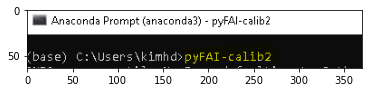

In [19]:
#The images used to display the GUI platform, are within my solar lab folder, where this python document is found.
img = mpimg.imread('calibrantAnacondaPrompt.png')
imgplot = plt.imshow(img)
plt.show()

   
2. Insert experiment settings
    - Import .tif file that contains your calibrant
        - --> Ex: LaB6_det315_3s_01221009_0001.tif for LaB6
    - Insert energy of beam / wavelength
    - Insert the calibrant
    - Insert the detector used
3. Save calibrant output as a .poni file

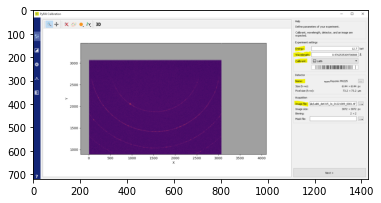

In [18]:
img = mpimg.imread('calibrant.png')
plt.imshow(img)
plt.show()

## Loading .poni file in order to plot 1D integration
After saving your .poni file with the rest of your documents. You are able to access the information in the file by applying
the code below.

In [1]:
import numpy #package that contains a large collection of mathematical functions
import pyFAI  #Fast Azimunthal Integration methods to use in Python 
##DELETEfrom pyFAI.azimuthalIntegrator import AzimuthalIntegrator #Import the Azimuthal Integrator method from the pyFAI package
print("Using pyFAI version", pyFAI.version) #knowing the version of your pyFAI will be helpful is you run into version issues.

In [2]:
#When it comes to loading the .poni file, make sure that insert the path of where the file can be found
#or you can use type in the .poni file by itself if the .poni file is within the same folder of this .py file.
ai = pyFAI.load("LaB6_det315_3s_01221009_0001.poni") #load poni file created through the GUI
print(ai)
#ai contains the detector geometry(type,pixel size, distortion) and experimental setup geometry

#you can see that the .poni file contains everything you selected on the GUI, from detector, geometry etc. 

Detector Rayonix MX225	 PixelSize= 7.324e-05, 7.324e-05 m
Wavelength= 9.762535e-11m
SampleDetDist= 3.156432e-01m	PONI= 2.126757e-01, 1.136402e-01m	rot1=0.003366  rot2= 0.000785  rot3= -0.000001 rad
DirectBeamDist= 315.645mm	Center: x=1537.064, y=2907.122 pix	Tilt=0.198 deg  tiltPlanRotation= 166.879 deg


# Display .tif raw data

In [1]:
#initializes the visualization module to work with the jupyter notebook
%matplotlib inline
from matplotlib.pyplot import subplots

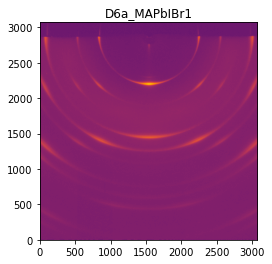

In [2]:
import fabio #used for reading of raw 2D data from various X-ray detectors
from pyFAI.gui import jupyter #Jupyter Notebook has some advanced visualization features when you use matplotlib and pyFAI. 

## Make sure to mark the path to where the .tif files are located
## If this python file is located in the same folder in which the .tif data is located, there is no need to mark a path.
img = fabio.open("D6a_MAPbIBr2_C60_L60on_30s_01231759_0002.tif").data

#visualization of the raw data 
jupyter.display(img, label ="D6a_MAPbIBr1")
pass

#The image below is the precalibrated/raw data, it is what the detector read during the experiment. 

# Plot XRD data
Below I will be incorporating 1D integration using my raw data (img) and .poni file (ai). There are two diffent ways of plotting the same 1D data, using jupyter.plot1d() or ax[ ].plot. 

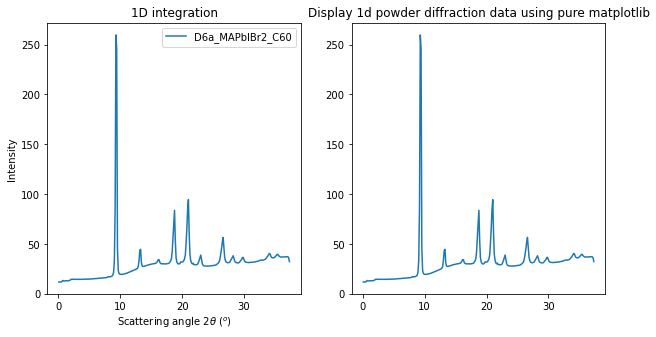

In [5]:
#1D INTEGRATION
#There are two ways to display your integrated/calibrated data. 1) You can use the imported jupyter from pyFAI or use
#matplotlib.

#Integrating the raw data image using the .poni calibrant
res = ai.integrate1d(img, 300, unit="2th_deg") # (image to integrate, # of bins, unit="2th_deg" or "q_nm^-1")

#Display the integration result
fig, ax = subplots(1,2, figsize=(10,5))
#plots the 1D integration of the data. XRD calibrated data.
jupyter.plot1d(res, label="D6a_MAPbIBr2_C60",ax=ax[0]) #jupyter.plot1d is from the pyFAI package, easy to display the integrated data



#Example using pure matplotlib
tth = res[0]
I = res[1]
ax[1].plot(tth, I, label="D6a_MAPbIBr2_C60")
ax[1].set_title("Display 1d powder diffraction data using pure matplotlib")
pass